https://altair-viz.github.io/getting_started/starting.html

### The Data

In [1]:
import pandas as pd

In [2]:
data = pd.DataFrame({'a': list('CCCDDDEEE'),
                     'b': [2, 7, 4, 1, 2, 6, 8, 4, 7]})

In [3]:
data

,a,b
0,C,2
1,C,7
2,C,4
3,D,1
4,D,2
5,D,6
6,E,8
7,E,4
8,E,7


### The Chart Object

In [4]:
import altair as alt

In [7]:
# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

In [5]:
chart = alt.Chart(data)

### Encodings and Marks

In [8]:
alt.Chart(data).mark_point()

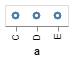

In [9]:
alt.Chart(data).mark_point().encode(
    x='a',
)

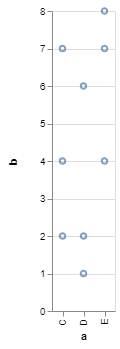

In [10]:
alt.Chart(data).mark_point().encode(
    x='a',
    y='b'
)

### Data Transformation: Aggregation

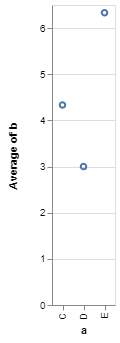

In [11]:
alt.Chart(data).mark_point().encode(
    x='a',
    y='average(b)'
)

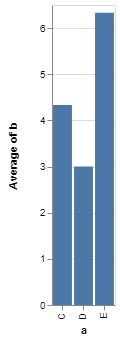

In [12]:
alt.Chart(data).mark_bar().encode(
    x='a',
    y='average(b)'
)

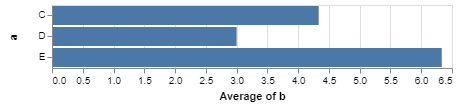

In [13]:
alt.Chart(data).mark_bar().encode(
    y='a',
    x='average(b)'
)

##### Aside: Examining the JSON Output

In [15]:
chart = alt.Chart(data).mark_bar().encode(
    x='a',
    y='average(b)',
)

In [16]:
print(chart.to_json())

{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.3.0.json",
  "config": {
    "view": {
      "height": 300,
      "width": 400
    }
  },
  "data": {
    "values": [
      {
        "a": "C",
        "b": 2
      },
      {
        "a": "C",
        "b": 7
      },
      {
        "a": "C",
        "b": 4
      },
      {
        "a": "D",
        "b": 1
      },
      {
        "a": "D",
        "b": 2
      },
      {
        "a": "D",
        "b": 6
      },
      {
        "a": "E",
        "b": 8
      },
      {
        "a": "E",
        "b": 4
      },
      {
        "a": "E",
        "b": 7
      }
    ]
  },
  "encoding": {
    "x": {
      "field": "a",
      "type": "nominal"
    },
    "y": {
      "aggregate": "average",
      "field": "b",
      "type": "quantitative"
    }
  },
  "mark": "bar"
}


In [17]:
y = alt.Y('average(b):Q')
print(y.to_json())

{
  "aggregate": "average",
  "field": "b",
  "type": "quantitative"
}


In [18]:
y = alt.Y(field='b', type='quantitative', aggregate='average')
print(y.to_json())

{
  "aggregate": "average",
  "field": "b",
  "type": "quantitative"
}


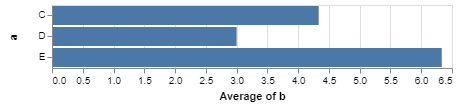

In [19]:
alt.Chart(data).mark_bar().encode(
    alt.Y('a', type='nominal'),
    alt.X('b', type='quantitative', aggregate='average')
)

### Customizing your Visualization

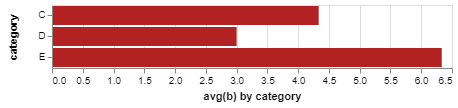

In [20]:
alt.Chart(data).mark_bar(color='firebrick').encode(
    alt.Y('a', axis=alt.Axis(title='category')),
    alt.X('average(b)', axis=alt.Axis(title='avg(b) by category'))
)

### Publishing your Visualization

In [21]:
chart = alt.Chart(data).mark_bar().encode(
    x='a',
    y='average(b)',
)
chart.save('chart.html')